In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings

In [2]:
crop_yield = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Github\Univelcity_Capstone\data\Digital Green Crop Yield Estimate Challenge\dataset.csv")
crop_yield.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [3]:
crop_yield.shape

(3870, 44)

In [4]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [5]:
crop_yield.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [6]:
crop_yield['CropTillageDate'] = pd.to_datetime(crop_yield['CropTillageDate'])
crop_yield['RcNursEstDate'] = pd.to_datetime(crop_yield['RcNursEstDate'])
crop_yield['Harv_date'] = pd.to_datetime(crop_yield[ 'Harv_date'])
crop_yield['Threshing_date'] = pd.to_datetime(crop_yield['Threshing_date'])
crop_yield['SeedingSowingTransplanting'] = pd.to_datetime(crop_yield['SeedingSowingTransplanting'])

In [7]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  3870 non-null   object        
 1   District                            3870 non-null   object        
 2   Block                               3870 non-null   object        
 3   CultLand                            3870 non-null   int64         
 4   CropCultLand                        3870 non-null   int64         
 5   LandPreparationMethod               3870 non-null   object        
 6   CropTillageDate                     3870 non-null   datetime64[ns]
 7   CropTillageDepth                    3870 non-null   int64         
 8   CropEstMethod                       3870 non-null   object        
 9   RcNursEstDate                       3787 non-null   datetime64[ns]
 10  SeedingSowingTransplanti

In [8]:
# Check for missing values
missing_values = crop_yield.isnull().sum()

# Get the dtypes of each column
column_dtypes = crop_yield.dtypes

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(crop_yield)) * 100

# Create a DataFrame with missing values and dtypes
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage,
    "Dtype": column_dtypes
})

missing_df.style.format({"Percentage": "{:.2f}%"})


,Missing Values,Percentage,Dtype
ID,0,0.00%,object
District,0,0.00%,object
Block,0,0.00%,object
CultLand,0,0.00%,int64
CropCultLand,0,0.00%,int64
LandPreparationMethod,0,0.00%,object
CropTillageDate,0,0.00%,datetime64[ns]
CropTillageDepth,0,0.00%,int64
CropEstMethod,0,0.00%,object
RcNursEstDate,83,2.14%,datetime64[ns]


In [9]:
# Set the threshold percentage
threshold = 30
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(crop_yield)) * 100

# Get the columns to drop
columns_to_drop = missing_percentage[missing_percentage >= threshold].index.tolist()

In [10]:
crop = crop_yield.copy()
crop = crop.drop(columns_to_drop, axis=1)
crop.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,2,Urea,NaN,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,2,DAP Urea,15.0,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,2,DAP,4.0,SoilApplied,Urea,5.0,65.0,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,2,DAP Urea,6.0,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,2,Urea DAP,15.0,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [11]:
# Check for missing values
missing_values = crop.isnull().sum()

# Get the dtypes of each column
column_dtypes = crop.dtypes

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(crop)) * 100

# Create a DataFrame with missing values and dtypes
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage,
    "Dtype": column_dtypes
})

missing_df.style.format({"Percentage": "{:.2f}%"})


,Missing Values,Percentage,Dtype
ID,0,0.00%,object
District,0,0.00%,object
Block,0,0.00%,object
CultLand,0,0.00%,int64
CropCultLand,0,0.00%,int64
LandPreparationMethod,0,0.00%,object
CropTillageDate,0,0.00%,datetime64[ns]
CropTillageDepth,0,0.00%,int64
CropEstMethod,0,0.00%,object
RcNursEstDate,83,2.14%,datetime64[ns]


In [12]:
crop.shape

(3870, 37)

In [13]:
crop_c = crop.dropna()

In [14]:
crop_c.shape

(1996, 37)

In [15]:
crop.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,3870.000000,3327.000000,3314.000000,3314.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,2.184496,11.452359,11.513881,29.200362,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,0.634632,8.422049,8.715856,12.139109,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,2.000000,6.000000,6.000000,23.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,2.000000,10.000000,10.000000,28.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,3.000000,15.000000,15.000000,36.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,4.000000,100.000000,90.000000,332.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [16]:
crop_cl = crop.fillna(crop.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_19092\3630262805.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  crop_cl = crop.fillna(crop.mean())
C:\Users\HP\AppData\Local\Temp\ipykernel_19092\3630262805.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_cl = crop.fillna(crop.mean())


In [17]:
crop_cl.shape

(3870, 37)

In [18]:
crop_cl.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,2.184496,11.452359,11.513881,29.200362,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.334114,41.536040,368.793161,2.138309,0.634632,7.808714,8.065317,11.233062,1100.908799,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,180.000000,2.000000,2.000000,6.000000,6.000000,25.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,379.726908,3.000000,2.000000,10.000000,10.000000,29.200362,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,400.000000,4.000000,3.000000,13.750000,15.000000,35.000000,600.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,4.000000,100.000000,90.000000,332.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [19]:
crop_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 1 to 3869
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  1996 non-null   object        
 1   District                            1996 non-null   object        
 2   Block                               1996 non-null   object        
 3   CultLand                            1996 non-null   int64         
 4   CropCultLand                        1996 non-null   int64         
 5   LandPreparationMethod               1996 non-null   object        
 6   CropTillageDate                     1996 non-null   datetime64[ns]
 7   CropTillageDepth                    1996 non-null   int64         
 8   CropEstMethod                       1996 non-null   object        
 9   RcNursEstDate                       1996 non-null   datetime64[ns]
 10  SeedingSowingTransplanti

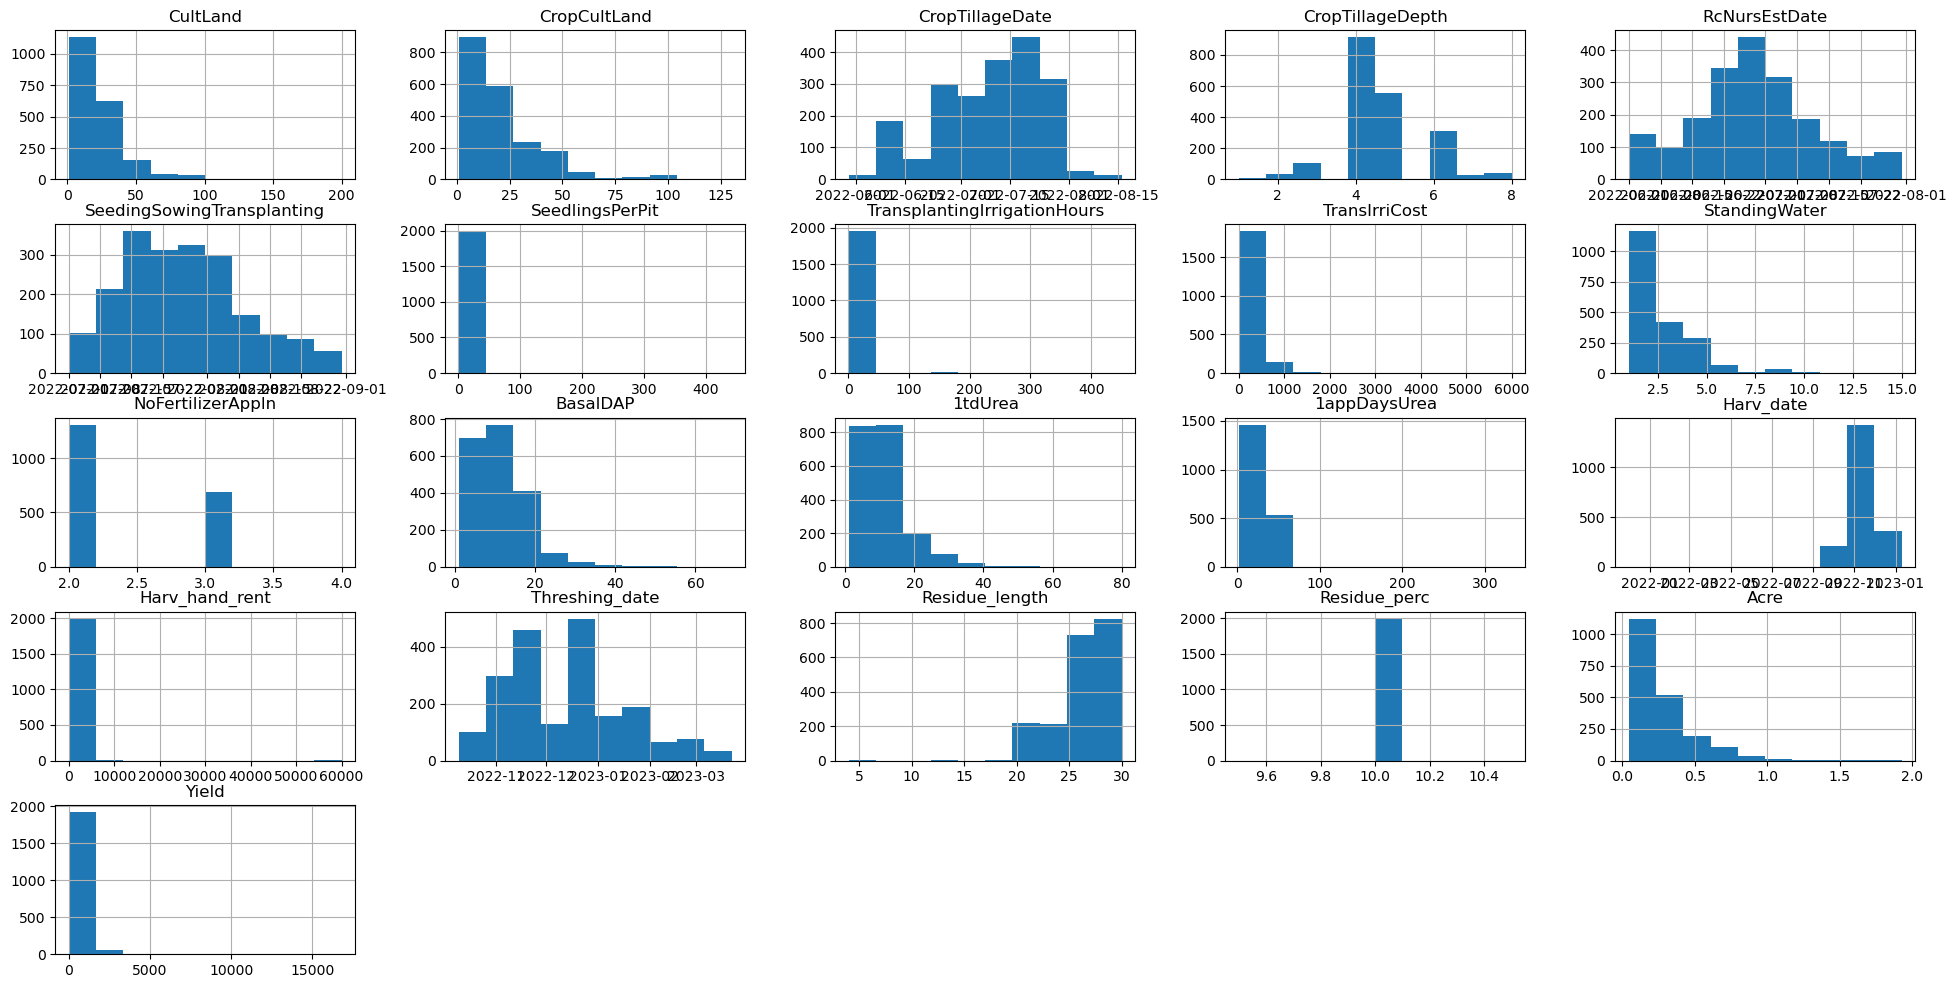

In [20]:
crop_c.hist(figsize=(24,12))
pyplot.show()

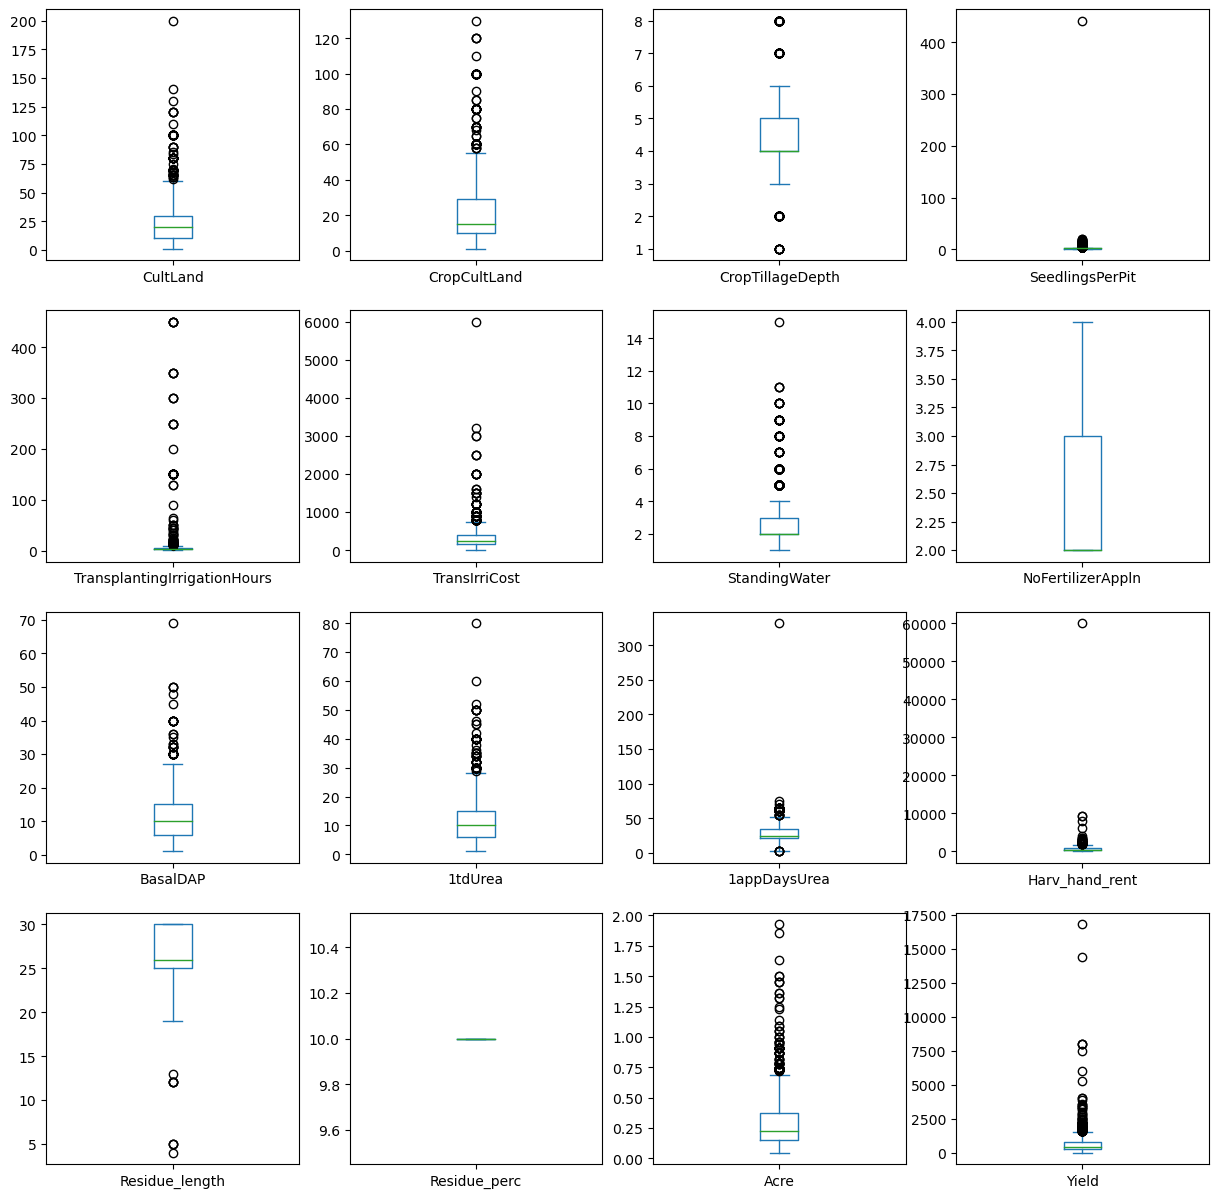

In [21]:
crop_c.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

In [22]:
Q1 = crop_cl['Yield'].quantile(0.25)
print(Q1)
Q3 = crop_cl['Yield'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
crop_cl_no_outliers = crop_cl[(crop_cl['Yield'] >= lower_bound) & (crop_cl['Yield'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", crop_cl.shape)
print("New data shape without outliers:", crop_cl_no_outliers.shape)

300.0
740.0
Original data shape: (3870, 37)
New data shape without outliers: (3638, 37)


In [23]:
Q1 = crop_c['Yield'].quantile(0.25)
print(Q1)
Q3 = crop_c['Yield'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
crop_c_no_outliers = crop_c[(crop_c['Yield'] >= lower_bound) & (crop_c['Yield'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", crop_c.shape)
print("New data shape without outliers:", crop_c_no_outliers.shape)

250.0
775.0
Original data shape: (1996, 37)
New data shape without outliers: (1880, 37)


In [24]:
def get_object_value_counts(df):
    object_columns = df.select_dtypes(include=['object']).columns
    value_counts = {}
    for column in object_columns:
        value_counts[column] = df[column].value_counts()
    return value_counts


object_value_counts = get_object_value_counts(crop_cl_no_outliers)
object_value_counts


{'ID': ID_GTFAC7PEVWQ9    1
 ID_ZNOGHGU133RM    1
 ID_FURMC2T93KEX    1
 ID_4M0YVSONVXDO    1
 ID_2J20LLTNC29N    1
                   ..
 ID_TUP6KXT5RJ0E    1
 ID_NWLART9E7A8S    1
 ID_95KRSCR3WYNJ    1
 ID_33UXPEUZFPGF    1
 ID_KEPOQDTCZC6S    1
 Name: ID, Length: 3638, dtype: int64,
 'District': Nalanda     1130
 Jamui       1018
 Vaishali     936
 Gaya         554
 Name: District, dtype: int64,
 'Block': Rajgir        809
 Mahua         604
 Jamui         594
 Khaira        423
 Gurua         353
 Noorsarai     321
 Chehrakala    239
 Wazirganj     202
 Garoul         93
 Name: Block, dtype: int64,
 'LandPreparationMethod': TractorPlough FourWheelTracRotavator                                     998
 TractorPlough                                                            929
 WetTillagePuddling TractorPlough FourWheelTracRotavator                  543
 WetTillagePuddling TractorPlough BullockPlough                           208
 WetTillagePuddling FourWheelTracRotavator           

In [25]:
categorical_feature_mask = crop_cl_no_outliers.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = crop_cl_no_outliers.columns[categorical_feature_mask].tolist()

categorical_cols

['ID',
 'District',
 'Block',
 'LandPreparationMethod',
 'CropEstMethod',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'CropbasalFerts',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Threshing_method',
 'Stubble_use']

In [26]:
crop_cl_no_outliers[categorical_cols].describe()

,ID,District,Block,LandPreparationMethod,CropEstMethod,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Threshing_method,Stubble_use
count,3638,3638,3638,3638,3638,3360,3360,3524,3144,3450,3638,3184,3186,3638,3638,3638
unique,3638,4,9,43,4,123,155,6,3,26,3,12,3,2,2,2
top,ID_GTFAC7PEVWQ9,Nalanda,Rajgir,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,Boring,Electric,DAP Urea,Broadcasting,Urea,Broadcasting,hand,machine,plowed_in_soil
freq,1,1130,809,998,3173,546,831,3019,2508,1564,3046,2653,3088,3435,2006,3616


In [27]:
crop_cl_no_outliers['CropTillageMonth'] = crop_cl_no_outliers['CropTillageDate'].dt.month
crop_cl_no_outliers['RcNursEstMonth'] = crop_cl_no_outliers['RcNursEstDate'].dt.month
crop_cl_no_outliers['Harv_Month'] = crop_cl_no_outliers[ 'Harv_date'].dt.month
crop_cl_no_outliers['Threshing_Month'] = crop_cl_no_outliers['Threshing_date'].dt.month
crop_cl_no_outliers['SeedingSowingTransplanting_Month'] = crop_cl_no_outliers['SeedingSowingTransplanting'].dt.month

C:\Users\HP\AppData\Local\Temp\ipykernel_19092\4103700305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_cl_no_outliers['CropTillageMonth'] = crop_cl_no_outliers['CropTillageDate'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_19092\4103700305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_cl_no_outliers['RcNursEstMonth'] = crop_cl_no_outliers['RcNursEstDate'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_19092\4103700305.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [28]:
crop_cl_no_outliers = crop_cl_no_outliers.drop(['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date', 'ID', 'SeedingSowingTransplanting'], axis=1)
crop_cl_no_outliers.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,CropTillageMonth,RcNursEstMonth,Harv_Month,Threshing_Month,SeedingSowingTransplanting_Month
0,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,5,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,200.000000,2.000000,2,Urea,11.452359,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,536.622443,machine,30,40,plowed_in_soil,0.312500,600,7,6.0,11,11,7
1,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,5,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,125.000000,3.000000,2,DAP Urea,15.000000,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,3.000000,machine,24,10,plowed_in_soil,0.312500,600,7,6.0,11,12,7
2,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.000000,Boring,Electric,80.000000,2.000000,2,DAP,4.000000,SoilApplied,Urea,5.0,65.0,RootApplication,hand,480.000000,machine,30,10,plowed_in_soil,0.148148,225,6,6.0,12,1,8
3,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.017677,NaN,NaN,379.726908,3.247522,2,DAP Urea,6.000000,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,240.000000,hand,26,10,plowed_in_soil,0.222222,468,6,6.0,12,12,7
4,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,4,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.000000,Boring,Electric,300.000000,2.000000,2,Urea DAP,15.000000,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,536.622443,machine,24,40,plowed_in_soil,0.468750,550,7,6.0,11,12,7


In [29]:
categorical_feature_mask = crop_cl_no_outliers.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = crop_cl_no_outliers.columns[categorical_feature_mask].tolist()

categorical_cols

['District',
 'Block',
 'LandPreparationMethod',
 'CropEstMethod',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'CropbasalFerts',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Threshing_method',
 'Stubble_use']

In [30]:
def cyclical_encode(df, columns):
    """
    Perform cyclical encoding on specified columns of a dataframe.
    
    Args:
    df (pd.DataFrame): The input dataframe.
    columns (list): A list of column names to be encoded.
    
    Returns:
    pd.DataFrame: A dataframe with the cyclical encoded columns added.
    """
    def encode_value(value, max_value):
        angle = (value - 1) * (2 * np.pi / max_value)
        return np.sin(angle), np.cos(angle)
    
    for column in columns:
        max_value = df[column].max()
        
        sin_col = f"{column}_sin"
        cos_col = f"{column}_cos"
        
        df[sin_col], df[cos_col] = zip(*df[column].apply(lambda x: encode_value(x, max_value)))
    
    return df


df = cyclical_encode(crop_cl_no_outliers, ['CropTillageMonth', 'RcNursEstMonth', 'Harv_Month', 'Threshing_Month', 'SeedingSowingTransplanting_Month'])
df.head()


,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,CropTillageMonth,RcNursEstMonth,Harv_Month,Threshing_Month,SeedingSowingTransplanting_Month,CropTillageMonth_sin,CropTillageMonth_cos,RcNursEstMonth_sin,RcNursEstMonth_cos,Harv_Month_sin,Harv_Month_cos,Threshing_Month_sin,Threshing_Month_cos,SeedingSowingTransplanting_Month_sin,SeedingSowingTransplanting_Month_cos
0,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,5,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,200.000000,2.000000,2,Urea,11.452359,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,536.622443,machine,30,40,plowed_in_soil,0.312500,600,7,6.0,11,11,7,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.866025,0.500000,-1.000000,-1.836970e-16
1,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,5,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,125.000000,3.000000,2,DAP Urea,15.000000,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,3.000000,machine,24,10,plowed_in_soil,0.312500,600,7,6.0,11,12,7,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.500000,0.866025,-1.000000,-1.836970e-16
2,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.000000,Boring,Electric,80.000000,2.000000,2,DAP,4.000000,SoilApplied,Urea,5.0,65.0,RootApplication,hand,480.000000,machine,30,10,plowed_in_soil,0.148148,225,6,6.0,12,1,8,-0.707107,-7.071068e-01,-0.974928,-0.222521,-0.500000,0.866025,0.000000,1.000000,-0.707107,7.071068e-01
3,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.017677,NaN,NaN,379.726908,3.247522,2,DAP Urea,6.000000,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,240.000000,hand,26,10,plowed_in_soil,0.222222,468,6,6.0,12,12,7,-0.707107,-7.071068e-01,-0.974928,-0.222521,-0.500000,0.866025,-0.500000,0.866025,-1.000000,-1.836970e-16
4,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,4,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.000000,Boring,Electric,300.000000,2.000000,2,Urea DAP,15.000000,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,536.622443,machine,24,40,plowed_in_soil,0.468750,550,7,6.0,11,12,7,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.500000,0.866025,-1.000000,-1.836970e-16


In [31]:
df.drop(['CropTillageMonth', 'RcNursEstMonth', 'Harv_Month', 'Threshing_Month', 'SeedingSowingTransplanting_Month'], axis=1, inplace=True)

In [32]:
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,District,Block,LandPreparationMethod,CropEstMethod,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Threshing_method,Stubble_use
0,2,6,18,3,10,47,0,1,16,0,8,0,1,1,1
1,2,7,41,3,24,47,0,1,6,0,8,0,0,1,1
2,0,2,18,3,94,133,0,1,0,2,8,1,0,1,1
3,0,2,18,3,24,47,6,3,6,0,8,0,0,0,1
4,2,6,24,3,10,150,0,1,17,0,8,0,1,1,1
5,3,1,15,2,35,46,0,1,4,2,8,0,0,0,1
6,1,4,15,3,35,47,1,3,0,0,8,0,0,1,1
7,2,7,6,0,123,155,0,1,6,0,8,0,1,0,1
8,1,4,15,3,35,47,1,3,0,0,8,0,0,1,1
9,2,6,29,3,10,24,0,1,16,0,8,0,0,0,1


In [33]:
df.head()


,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,CropTillageMonth_sin,CropTillageMonth_cos,RcNursEstMonth_sin,RcNursEstMonth_cos,Harv_Month_sin,Harv_Month_cos,Threshing_Month_sin,Threshing_Month_cos,SeedingSowingTransplanting_Month_sin,SeedingSowingTransplanting_Month_cos
0,2,6,45,40,18,5,3,2.0,10,47,5.000000,0,1,200.000000,2.000000,2,16,11.452359,0,8,15.0,18.0,0,1,536.622443,1,30,40,1,0.312500,600,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.866025,0.500000,-1.000000,-1.836970e-16
1,2,7,26,26,41,5,3,2.0,24,47,5.000000,0,1,125.000000,3.000000,2,6,15.000000,0,8,20.0,39.0,0,0,3.000000,1,24,10,1,0.312500,600,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.500000,0.866025,-1.000000,-1.836970e-16
2,0,2,10,10,18,6,3,2.0,94,133,4.000000,0,1,80.000000,2.000000,2,0,4.000000,2,8,5.0,65.0,1,0,480.000000,1,30,10,1,0.148148,225,-0.707107,-7.071068e-01,-0.974928,-0.222521,-0.500000,0.866025,0.000000,1.000000,-0.707107,7.071068e-01
3,0,2,15,15,18,6,3,2.0,24,47,8.017677,6,3,379.726908,3.247522,2,6,6.000000,0,8,5.0,5.0,0,0,240.000000,0,26,10,1,0.222222,468,-0.707107,-7.071068e-01,-0.974928,-0.222521,-0.500000,0.866025,-0.500000,0.866025,-1.000000,-1.836970e-16
4,2,6,60,60,24,4,3,2.0,10,150,9.000000,0,1,300.000000,2.000000,2,17,15.000000,0,8,30.0,26.0,0,1,536.622443,1,24,40,1,0.468750,550,-1.000000,-1.836970e-16,-0.974928,-0.222521,-0.866025,0.500000,-0.500000,0.866025,-1.000000,-1.836970e-16


In [34]:
df.shape

(3638, 41)

In [35]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Convert to a DataFrame and display as a table
missing_df = missing_values.to_frame(name="Missing Values")
missing_df["Percentage"] = missing_percentage
missing_df.style.format({"Percentage": "{:.2f}%"})

,Missing Values,Percentage
District,0,0.00%
Block,0,0.00%
CultLand,0,0.00%
CropCultLand,0,0.00%
LandPreparationMethod,0,0.00%
CropTillageDepth,0,0.00%
CropEstMethod,0,0.00%
SeedlingsPerPit,0,0.00%
NursDetFactor,0,0.00%
TransDetFactor,0,0.00%


In [36]:
df = df.dropna()

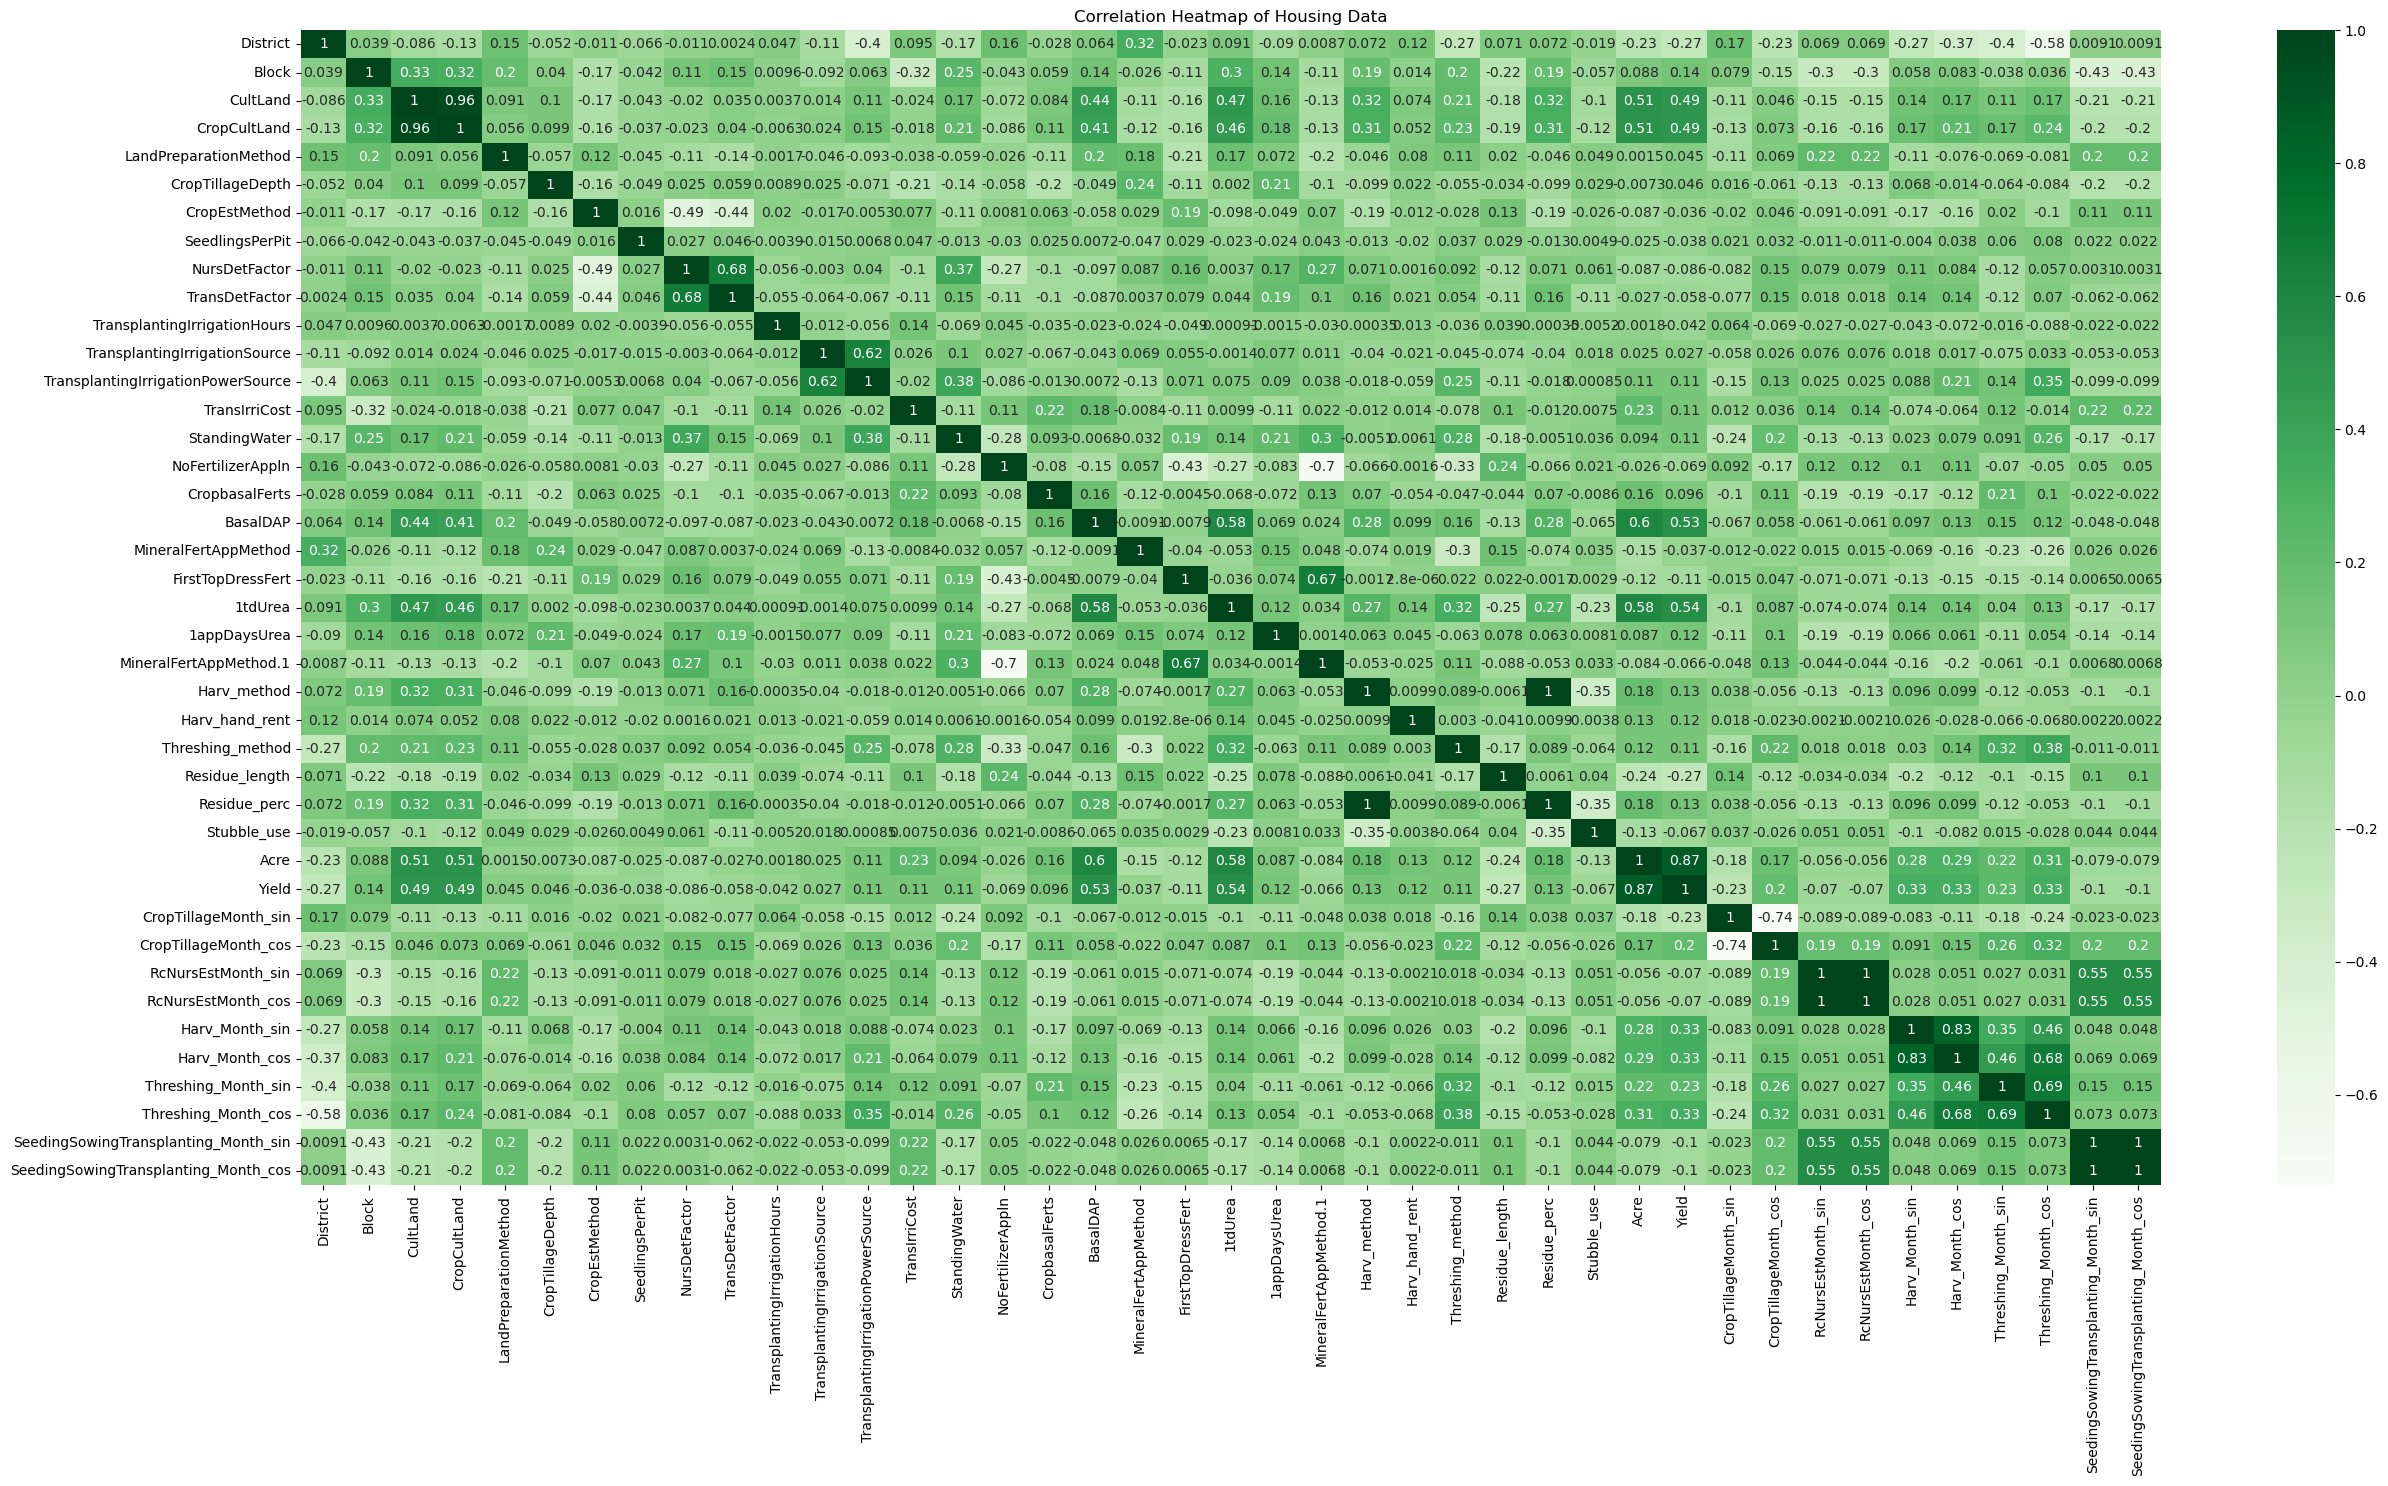

In [37]:
pyplot.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
pyplot.title('Correlation Heatmap of Housing Data')
pyplot.show()

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=5)
bestfeatures

Y= df["Yield"]
X = df.loc[:, df.columns != 'Yield']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                 Specs      Score
29                                Acre  53.808182
20                             1tdUrea   9.122869
17                            BasalDAP   9.074937
0                             District   7.431760
3                         CropCultLand   6.473305
2                             CultLand   6.348065
37                 Threshing_Month_cos   5.963576
35                      Harv_Month_cos   4.732874
34                      Harv_Month_sin   4.269418
25                    Threshing_method   3.916313
36                 Threshing_Month_sin   3.708809
18                MineralFertAppMethod   3.561293
31                CropTillageMonth_cos   3.365454
30                CropTillageMonth_sin   3.328169
1                                Block   3.278669
26                      Residue_length   3.231753
12  TransplantingIrrigationPowerSource   2.936791
9                       TransDetFactor   2.788930
11       TransplantingIrrigationSource   2.788930


In [39]:
col = X.columns

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledX = pd.DataFrame(scaler.fit_transform(X), columns= col)
# summarize transformed data
rescaledX.head(5)

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,CropTillageMonth_sin,CropTillageMonth_cos,RcNursEstMonth_sin,RcNursEstMonth_cos,Harv_Month_sin,Harv_Month_cos,Threshing_Month_sin,Threshing_Month_cos,SeedingSowingTransplanting_Month_sin,SeedingSowingTransplanting_Month_cos
0,0.323379,0.683215,0.770650,0.753684,-0.523784,0.419720,0.327919,-0.098134,-0.782609,-0.420807,-0.067646,-0.341196,-0.117616,-0.494046,-0.581202,-0.265781,1.429433,0.116661,-0.444770,-0.036379,0.583195,-0.985356,-0.417777,4.607060,0.045541,0.901352,1.060338,4.607060,0.0789,0.363089,-0.573128,0.424379,-0.738068,-0.738068,-0.104016,0.251883,-0.818222,-0.527194,-0.651236,-0.651236
1,0.323379,1.133709,-0.023908,0.127597,1.541456,0.419720,0.327919,-0.098134,-0.433864,-0.420807,-0.067646,-0.341196,-0.117616,-0.737297,-0.123926,-0.265781,-0.022871,0.687317,-0.444770,-0.036379,1.294314,0.851937,-0.417777,-0.217058,-0.436905,0.901352,-0.839668,-0.217058,0.0789,0.363089,-0.573128,0.424379,-0.738068,-0.738068,-0.104016,0.251883,-0.002545,0.616071,-0.651236,-0.651236
2,-1.620720,-1.118760,-0.693010,-0.587931,-0.523784,1.325929,0.327919,-0.098134,1.309859,1.368312,-0.090763,-0.341196,-0.117616,-0.883248,-0.581202,-0.265781,-0.894253,-1.082090,2.265773,-0.036379,-0.839043,3.126680,0.561533,-0.217058,-0.005651,0.901352,1.060338,-0.217058,0.0789,-0.773710,1.723480,-1.751942,-0.738068,-0.738068,2.417257,1.688625,1.111692,1.034535,1.535541,1.535541
3,-1.620720,-1.118760,-0.483915,-0.364329,-0.523784,1.325929,0.327919,-0.098134,-0.433864,-0.420807,0.002116,4.655203,2.232058,0.088872,-0.010741,-0.265781,-0.022871,-0.760379,-0.444770,-0.036379,-0.839043,-2.122727,-0.417777,-0.217058,-0.222634,-1.109444,-0.206333,-0.217058,0.0789,-0.261350,1.723480,-1.751942,-0.738068,-0.738068,2.417257,1.688625,-0.002545,0.616071,-0.651236,-0.651236
4,0.323379,0.683215,1.397932,1.648094,0.014974,-0.486488,0.327919,-0.098134,-0.782609,1.721976,0.024825,-0.341196,-0.117616,-0.169711,-0.581202,-0.265781,1.574663,0.687317,-0.444770,-0.036379,2.716552,-0.285435,-0.417777,4.607060,0.045541,0.901352,-0.839668,4.607060,0.0789,1.443850,-0.573128,0.424379,-0.738068,-0.738068,-0.104016,0.251883,-0.002545,0.616071,-0.651236,-0.651236


In [41]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size=0.25, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 2667 samples
Test set size: 889 samples


In [42]:
X_train_const = sm.add_constant(X_train)
X_train_const


,const,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_hand_rent,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,CropTillageMonth_sin,CropTillageMonth_cos,RcNursEstMonth_sin,RcNursEstMonth_cos,Harv_Month_sin,Harv_Month_cos,Threshing_Month_sin,Threshing_Month_cos,SeedingSowingTransplanting_Month_sin,SeedingSowingTransplanting_Month_cos
1880,1.0,0.323379,1.133709,0.143367,0.306479,-0.523784,1.325929,0.327919,-0.228955,-0.334223,-0.420807,-0.067646,-0.341196,-0.117616,-0.737297,-0.581202,-0.265781,-0.894253,0.687317,-0.444770,-0.036379,1.009867,-0.372925,-0.417777,-0.217058,0.193251,0.901352,-0.523000,-0.217058,0.0789,0.363089,-0.573128,0.424379,1.354890,1.354890,-0.104016,0.251883,2.225929,0.616071,1.535541,1.535541
455,1.0,-1.620720,1.584203,-0.693010,-0.587931,0.823112,-0.486488,0.327919,0.032688,0.014522,-0.358396,-0.090763,-0.341196,-0.117616,-0.980548,-0.123926,-0.265781,-0.022871,-0.921234,-0.444770,-0.036379,-0.127924,-0.372925,-0.417777,-0.217058,-0.349207,0.901352,1.060338,-0.217058,0.0789,-0.773710,-0.573128,0.424379,-0.738068,-0.738068,-0.104016,0.251883,-0.818222,-0.527194,-0.651236,-0.651236
1452,1.0,0.323379,1.133709,2.317947,2.631946,-0.793164,-0.486488,-3.699986,-0.005707,2.032259,1.825994,-0.067646,0.491537,-0.117616,-0.656213,0.790625,-0.265781,-0.022871,0.848173,-0.444770,-0.036379,0.583195,0.939427,-0.417777,4.607060,0.045541,-1.109444,0.427002,4.607060,0.0789,-0.069215,1.723480,-1.751942,-0.738068,-0.738068,-0.104016,0.251883,-0.002545,0.616071,-0.651236,-0.651236
858,1.0,-0.648671,-0.217772,-0.274821,-0.140726,-0.793164,-1.392697,0.327919,0.032688,1.808066,-0.025537,-0.136999,0.491537,2.232058,0.088872,3.534280,-1.851549,1.429433,0.116661,-0.444770,1.798586,0.087386,-0.005435,2.520153,-0.217058,-0.349207,0.901352,-0.206333,-0.217058,0.0789,-0.226416,-0.573128,0.424379,1.354890,1.354890,-0.104016,0.251883,1.111692,1.034535,1.535541,1.535541
1867,1.0,-0.648671,-0.217772,0.561555,0.306479,-0.793164,-1.392697,0.327919,0.032688,-0.932071,-0.420807,-0.136999,0.491537,2.232058,0.088872,1.247901,1.319987,1.138972,0.116661,-0.444770,-0.036379,-0.839043,-0.372925,-0.417777,-0.217058,-0.304003,0.901352,0.427002,-0.217058,0.0789,-0.226416,-0.573128,0.424379,1.354890,1.354890,-0.104016,0.251883,-0.002545,0.616071,1.535541,1.535541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,1.0,1.295428,-2.019747,-0.274821,-0.587931,1.541456,-0.486488,0.327919,-0.228955,-0.433864,-0.649648,0.047943,-0.341196,-0.117616,2.100635,-1.038478,-0.265781,-0.894253,1.491593,-0.444770,-0.036379,2.005433,-0.110455,-0.417777,-0.217058,0.464479,-1.109444,1.060338,-0.217058,0.0789,1.345599,-0.573128,0.424379,1.354890,1.354890,-1.026865,-1.710743,-1.116781,-2.088924,1.535541,1.535541
3409,1.0,0.323379,1.133709,2.861592,3.213312,1.541456,0.419720,0.327919,-0.098134,-0.433864,-0.420807,0.002116,2.157004,2.232058,0.088872,0.333349,-0.265781,-0.022871,0.687317,-0.444770,-0.036379,2.716552,0.939427,-0.417777,-0.217058,0.464479,0.901352,-4.639678,-0.217058,0.0789,1.443850,-0.573128,0.424379,1.354890,1.354890,2.417257,1.688625,1.111692,1.034535,-0.651236,-0.651236
2789,1.0,-1.620720,-1.118760,-0.274821,-0.140726,-0.523784,0.419720,0.327919,-0.098134,-0.433864,-0.420807,0.002116,4.655203,2.232058,0.088872,-0.010741,-1.851549,-0.894253,-0.921234,2.265773,1.798586,0.087386,-0.005435,2.520153,-0.217058,-0.326605,-1.109444,-0.523000,-0.217058,0.0789,-0.517530,-0.573128,0.424379,-0.738068,-0.738068,-0.104016,0.251883,-0.002545,0.616071,-0.651236,-0.651236
311,1.0,1.295428,0.23272

In [43]:
# Ensure the indices are aligned
X_train_const = X_train_const.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const ).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     348.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:15:12   Log-Likelihood:                -16593.
No. Observations:                2667   AIC:                         3.326e+04
Df Residuals:                    2629   BIC:                         3.349e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [44]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error' 

In [45]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('BRidge', BayesianRidge()))
models.append(('SGD', SGDRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [46]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = math.sqrt(mean_squared_error(res.predict(X_train), y_train))
    train_results.append(train_result)
    
    # Test results
    test_result = math.sqrt(mean_squared_error(res.predict(X_test), y_test))
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 16260.790315 (5094.792152) 121.851642 201.062996
LASSO: 15949.105837 (5054.077696) 122.186091 168.371822
Ridge: 16260.815877 (5089.239664) 121.851801 200.231049
BRidge: 16267.928146 (5052.271034) 121.862333 194.553096
SGD: 36411.308183 (23341.026937) 186.714216 182.522526
EN: 22089.067048 (3745.429277) 145.835156 151.782430
KNN: 18868.789647 (2883.192043) 110.048859 142.461018
CART: 15913.927171 (2318.698948) 1.338059 134.801658
SVR: 69922.890633 (7333.541615) 260.370685 260.708569


c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

MLP: 23289.763646 (10951.375236) 119.412688 147.357027
ABR: 17554.958292 (1949.951130) 122.198164 136.010223
GBR: 9002.650107 (2145.725813) 77.081709 111.414813
RFR: 9062.600110 (2566.882500) 35.011711 101.816231
ETR: 8458.792684 (2200.205218) 1.346147 99.958189


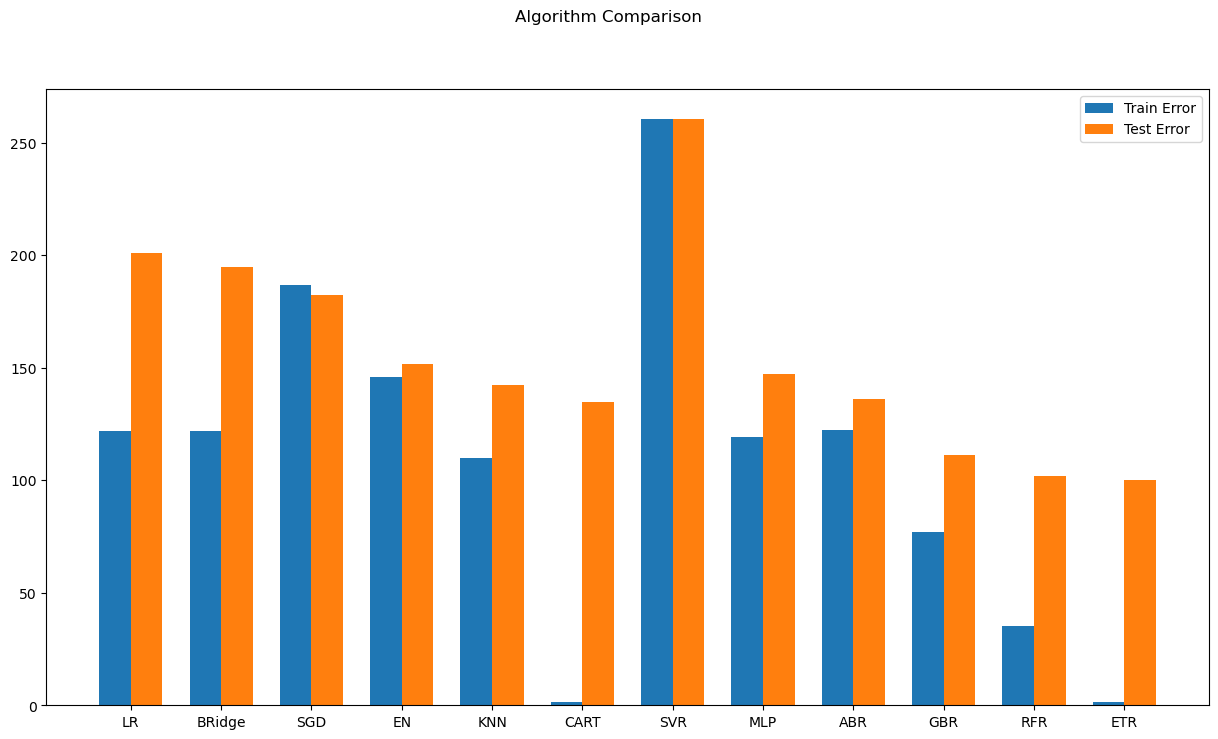

In [47]:
fig = pyplot.figure()

ind = np.arange(len(names)-2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results[0:1] + train_results[3:],  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results[0:1] + test_results[3:], width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names[0:1] + names[3:])
pyplot.show()

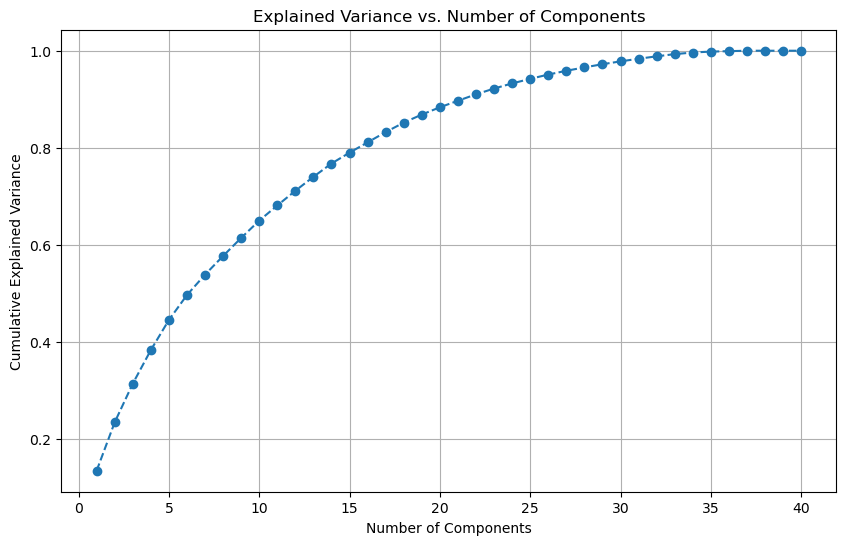

In [48]:
from sklearn.decomposition import PCA


# Fitting PCA model
pca = PCA().fit(X_train)

# Calculating explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Ploting cumulative explained variance
pyplot.figure(figsize=(10, 6))
pyplot.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
pyplot.xlabel('Number of Components')
pyplot.ylabel('Cumulative Explained Variance')
pyplot.title('Explained Variance vs. Number of Components')
pyplot.grid()
pyplot.show()


In [49]:
#number of components that explain at least 95% variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components explaining at least 95% variance: {n_components}')

Number of components explaining at least 95% variance: 26


In [50]:
# Applying PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [51]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train_pca, y_train)
    train_result = math.sqrt(mean_squared_error(res.predict(X_train_pca), y_train))
    train_results.append(train_result)
    
    # Test results
    test_result = math.sqrt(mean_squared_error(res.predict(X_test_pca), y_test))
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 24861.043807 (11423.770814) 141.800578 153.808752
LASSO: 23941.505956 (8976.827582) 141.905895 153.426144
Ridge: 24844.777060 (11381.045852) 141.800600 153.801687
BRidge: 24657.652275 (10886.466841) 141.804823 153.714741
SGD: 41911.520291 (19703.048657) 149.312394 159.354946
EN: 25000.537130 (4081.023169) 154.912618 160.289772
KNN: 19420.179134 (2933.584853) 110.834137 141.426474
CART: 35145.080317 (5768.359820) 1.338059 199.809500
SVR: 69120.627697 (7318.989443) 258.692747 258.877703


c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

MLP: 20478.164711 (5828.614070) 121.838601 147.428135
ABR: 32569.823212 (3384.566622) 160.277879 180.583969
GBR: 16544.592482 (2994.182835) 93.074436 134.869298
RFR: 16485.784509 (3076.646397) 47.526515 135.427599
ETR: 14181.432522 (2612.315814) 1.338592 127.649694


In [52]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


In [53]:
models2 = [
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('CatBoost', CatBoostRegressor(silent=True))
]

names = []
kfold_results1 = []
test_results1 = []
train_results1 = []
for name, model in models2:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
    kfold_results1.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train_pca, y_train)
    train_result1 = math.sqrt(mean_squared_error(res.predict(X_train_pca), y_train))
    train_results1.append(train_result1)
    
    # Test results
    test_result1 = math.sqrt(mean_squared_error(res.predict(X_test_pca), y_test))
    test_results1.append(test_result1)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result1, test_result1)
    print(msg)

XGBoost: 15932.290827 (3182.777091) 10.938349 136.552711
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] Start training from score 486.334167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 26
[LightGBM] [Info] Start training from score 484.756667
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66

### Model Tuning

Performing model tuning for alorightms with lower test error

In [54]:
#  Grid search : KNeighborsRegressor 
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.
'''
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19394.906894 using {'n_neighbors': 7}
-26192.177520 (5056.742607) with: {'n_neighbors': 1}
-20015.347773 (3146.143891) with: {'n_neighbors': 3}
-19420.179134 (2933.584853) with: {'n_neighbors': 5}
-19394.906894 (2175.003288) with: {'n_neighbors': 7}
-19916.754946 (2559.029857) with: {'n_neighbors': 9}
-20675.121642 (2600.541456) with: {'n_neighbors': 11}
-21500.299527 (2847.711256) with: {'n_neighbors': 13}
-22350.230288 (2964.232608) with: {'n_neighbors': 15}
-22883.699157 (2983.338563) with: {'n_neighbors': 17}
-23571.713658 (3157.756124) with: {'n_neighbors': 19}
-24041.286331 (3088.372147) with: {'n_neighbors': 21}


In [56]:
#  Grid search : GradientBoostingRegressor  
param_grid ={'n_estimators': [50,100,150,200,250,300,350,400],
               'learning_rate': [0.01, 0.05, 0.1, 0.2]}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -15035.251908 using {'learning_rate': 0.1, 'n_estimators': 400}
-56312.299744 (4693.275207) with: {'learning_rate': 0.01, 'n_estimators': 50}
-42027.099793 (3481.330058) with: {'learning_rate': 0.01, 'n_estimators': 100}
-34000.968360 (2868.005283) with: {'learning_rate': 0.01, 'n_estimators': 150}
-29093.121342 (2656.262239) with: {'learning_rate': 0.01, 'n_estimators': 200}
-25920.462594 (2643.746610) with: {'learning_rate': 0.01, 'n_estimators': 250}
-23792.473487 (2635.773279) with: {'learning_rate': 0.01, 'n_estimators': 300}
-22240.815187 (2668.356921) with: {'learning_rate': 0.01, 'n_estimators': 350}
-21071.951098 (2633.184797) with: {'learning_rate': 0.01, 'n_estimators': 400}
-25644.683568 (2663.494448) with: {'learning_rate': 0.05, 'n_estimators': 50}
-19303.454184 (2729.226111) with: {'learning_rate': 0.05, 'n_estimators': 100}
-17260.143325 (2850.778899) with: {'learning_rate': 0.05, 'n_estimators': 150}
-16364.759592 (2934.934008) with: {'learning_rate': 0.05, 'n_es

In [57]:
# Grid search : RandomForestRegressor 
param_grid = {
    'n_estimators': [50,100,150,200,250,300,350,400],
    'max_features': [2,4,6,8,10,12,14,16,18,20]
}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -15255.871658 using {'max_features': 14, 'n_estimators': 350}
-20917.093562 (2511.836546) with: {'max_features': 2, 'n_estimators': 50}
-20316.339032 (2357.817959) with: {'max_features': 2, 'n_estimators': 100}
-20376.782740 (2528.443103) with: {'max_features': 2, 'n_estimators': 150}
-20388.599709 (2656.976798) with: {'max_features': 2, 'n_estimators': 200}
-20205.952092 (2544.640901) with: {'max_features': 2, 'n_estimators': 250}
-20272.276328 (2271.616217) with: {'max_features': 2, 'n_estimators': 300}
-20334.926866 (2546.207807) with: {'max_features': 2, 'n_estimators': 350}
-20180.039321 (2354.221480) with: {'max_features': 2, 'n_estimators': 400}
-18070.872546 (2739.727507) with: {'max_features': 4, 'n_estimators': 50}
-17569.633455 (2554.309255) with: {'max_features': 4, 'n_estimators': 100}
-17285.000427 (2618.200336) with: {'max_features': 4, 'n_estimators': 150}
-17191.725239 (2543.992267) with: {'max_features': 4, 'n_estimators': 200}
-17302.851074 (2514.340525) with: 

In [58]:
#  Grid search : ExtraTreesRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
''' 
param_grid ={
    'n_estimators': [50,100,150,200,250,300,350,400],
    'max_features': [3,6,9,12,15,18,20]}
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -14192.372286 using {'max_features': 20, 'n_estimators': 250}
-18936.331002 (2430.235416) with: {'max_features': 3, 'n_estimators': 50}
-18668.512682 (2333.974856) with: {'max_features': 3, 'n_estimators': 100}
-18575.199300 (2381.595122) with: {'max_features': 3, 'n_estimators': 150}
-18553.895829 (2370.279986) with: {'max_features': 3, 'n_estimators': 200}
-18504.982317 (2353.803367) with: {'max_features': 3, 'n_estimators': 250}
-18492.472673 (2289.720444) with: {'max_features': 3, 'n_estimators': 300}
-18427.599800 (2331.500300) with: {'max_features': 3, 'n_estimators': 350}
-18395.560339 (2341.304933) with: {'max_features': 3, 'n_estimators': 400}
-16619.162027 (2664.665329) with: {'max_features': 6, 'n_estimators': 50}
-16618.357190 (2827.195453) with: {'max_features': 6, 'n_estimators': 100}
-16498.972210 (2654.906665) with: {'max_features': 6, 'n_estimators': 150}
-16421.205535 (2514.802830) with: {'max_features': 6, 'n_estimators': 200}
-16353.255852 (2527.214245) with: 

In [59]:
# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model = xgb.XGBRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator= model, param_grid=xgb_param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best: -13507.876193 using {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
-44162.539214 (4065.466064) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
-44252.034051 (4040.415448) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
-44398.540444 (4103.323681) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
-29786.972669 (3012.452207) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
-29972.129480 (2990.603150) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
-30213.102278 (3028.531736) with: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2

In [60]:
# Define the parameter grid
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgb_model = lgb.LGBMRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid =  GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 729 candidates, totalling 7290 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 2667, number of used features: 26
[LightGBM] [Info] Start training from score 485.796025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [61]:
# Define the parameter grid
cat_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0]
}
cat_model = CatBoostRegressor(silent=True)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=cat_model, param_grid=cat_param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_pca, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best: -12610.100049 using {'colsample_bylevel': 1.0, 'depth': 7, 'iterations': 300, 'learning_rate': 0.1, 'subsample': 0.6}
-48929.132821 (4380.645337) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.01, 'subsample': 0.6}
-48928.595233 (4461.610844) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.01, 'subsample': 0.8}
-48869.486782 (4512.038673) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.01, 'subsample': 1.0}
-18340.478430 (2718.052509) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 0.6}
-18352.918242 (2826.621997) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 0.8}
-18308.586843 (2637.986172) with: {'colsample_bylevel': 0.6, 'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 1.0}
-16288.450407 (3

In [62]:
model1 = KNeighborsRegressor(n_neighbors= 7)
model1.fit(X_train_pca, y_train)

KNeighborsRegressor(n_neighbors=7)

In [63]:
predictions1 = model1.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions1)))

142.98029811191307


In [64]:
model2 = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=400)
model2.fit(X_train_pca, y_train)

GradientBoostingRegressor(n_estimators=400)

In [65]:
predictions2 = model2.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions2)))

128.61013952727745


In [66]:
model3 = RandomForestRegressor(max_features= 14, n_estimators= 350)
model3.fit(X_train_pca, y_train)

RandomForestRegressor(max_features=14, n_estimators=350)

In [67]:
predictions3 = model3.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions3)))

130.29621621936053


In [68]:
model4 = ExtraTreesRegressor(max_features=20, n_estimators=250)
model4.fit(X_train_pca, y_train)

ExtraTreesRegressor(max_features=20, n_estimators=250)

In [69]:
predictions4 = model4.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions4)))

127.42908985215632


In [70]:
model5 = xgb.XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.1, max_depth=5, n_estimators =300, subsample=1.0)
model5.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
predictions5 = model5.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions5)))

123.45712935301863


In [72]:
model6 = lgb.LGBMRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=300, num_leaves=31, subsample=0.6)
model6.fit(X_train_pca, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 2667, number of used features: 26
[LightGBM] [Info] Start training from score 485.796025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

LGBMRegressor(colsample_bytree=0.6, max_depth=7, n_estimators=300,
              subsample=0.6)

In [73]:
predictions6 = model6.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions6)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
123.5497053870351


In [74]:
model7 = CatBoostRegressor(silent=True, colsample_bylevel=1.0, depth=7, iterations=300, learning_rate=0.1, subsample=0.6)
model7.fit(X_train_pca, y_train)

In [75]:
predictions7 = model7.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions7)))

120.8949332339506


In [77]:
from sklearn.ensemble import StackingRegressor

gbr = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=400)
rfr = RandomForestRegressor(max_features= 14, n_estimators= 350)
etr = ExtraTreesRegressor(max_features=20, n_estimators=250)
estimators = [
    ('GradBoost', gbr),
    ('RandForest', rfr),
    ('ETR', etr)
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=1.0),passthrough=True)
stacking_regressor.fit(X_train_pca, y_train)

StackingRegressor(estimators=[('GradBoost',
                               GradientBoostingRegressor(n_estimators=400)),
                              ('RandForest',
                               RandomForestRegressor(max_features=14,
                                                     n_estimators=350)),
                              ('ETR',
                               ExtraTreesRegressor(max_features=20,
                                                   n_estimators=250))],
                  final_estimator=Ridge(), passthrough=True)

In [78]:
predictions8 = stacking_regressor.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions8)))

120.65842840462473


In [79]:
xgboost = xgb.XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.1, max_depth=5, n_estimators =300, subsample=1.0)
lightgbm = lgb.LGBMRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=300, num_leaves=31, subsample=0.6)
catboost = CatBoostRegressor(silent=True, colsample_bylevel=1.0, depth=7, iterations=300, learning_rate=0.1, subsample=0.6)
estimators2 = [
    ('XGB', xgboost),
    ('LGBM', lightgbm),
    ('CATB', catboost)
]
stacking_regressor2 = StackingRegressor(estimators=estimators2, final_estimator=Ridge(alpha=1.0),passthrough=True)
stacking_regressor2.fit(X_train_pca, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 2667, number of used features: 26
[LightGBM] [Info] Start training from score 485.796025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

StackingRegressor(estimators=[('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('LGBM',
                               LGBMRegressor(colsample_bytree=0.6, max_depth=7,
                                             n_estimators=300, subsample=0.6)),
                              ('CATB',
                               <catboost.core.CatBoostRegressor object at 0x00000234F5F38850>)],
                  final_estimator=Ridge(), passthrough=True)

In [80]:
predictions9 = stacking_regressor2.predict(X_test_pca)
print(math.sqrt(mean_squared_error(y_test, predictions9)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
119.1977898634495


In [81]:
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('GradBoost',
                               GradientBoostingRegressor(n_estimators=400)),
                              ('RandForest',
                               RandomForestRegressor(max_features=14,
                                                     n_estimators=350)),
                              ('ETR',
                               ExtraTreesRegressor(max_features=20,
                                                   n_estimators=250))],
                  final_estimator=Ridge(), passthrough=True)

In [83]:
predictions10 = stacking_regressor.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predictions8)))

120.65842840462473
